## TP2 : Options américaines

In [1]:
import numpy as np


### Tache 1 :

In [88]:
def GSP(alpha , beta , gamma , B , G, x_0 , epsilon , K) :
    """
    
    """
    def psi(X) :
        n = X.shape[0]
        Z = np.zeros(n)
        Z[0] = max((1/alpha)*(B[0] - beta*X[0]) , G[0])
        for i in range(1,n-1):
            Z[i] = max((1/alpha)*(B[i] - gamma*Z[i-1]- beta*X[i+1]) , G[i])
        
        Z[n-1] = max((1/alpha)*(B[n-1] - gamma*Z[n-2]) , G[n-1])
        return Z
        
    res = x_0
    k = 0 
    while k <= K :
        res_prec = res 
        res = psi(res)
        if np.linalg.norm(res - res_prec) / np.linalg.norm(res_prec) <= epsilon : 
            return (res , k)
        k+=1
    
    return (res , K)
    



In [73]:
alpha = 1
beta = 1
gamma = 1
B = np.array([1,1,1])
G = np.array([0,0,0])
epsilon = 10e-4
K = 1000
x_0 = np.array([0,1,0])
res , k  = GSP(alpha , beta , gamma , B , G, x_0 , epsilon , K)
print(res)
print(k)

[   1. -500.  501.]
1000


### Tache 2 :

1


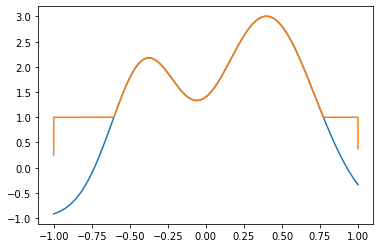

In [90]:
alpha = 2
beta = -1
gamma = -1
N = 100000
B = np.zeros(N)
delta_X = 2/(N+1)
val_x = [-1+i*delta_X for i in range(1 ,N+1)]
def g(x):
    return 3*np.exp(-(x+0.4)**2 / 0.1) + 4*np.exp(-(x-0.4)**2 / 0.2) - 1
G = np.array([g(x) for x in val_x])
epsilon = 10e-4
K = 1000
x_0 = np.ones(N)
res , k  = GSP(alpha , beta , gamma , B , G, x_0 , epsilon , K)
#print(res)
print(k)

x = [-1 + i*delta_X for i in range(1,N+1)] 
y = [g(x) for x in x]
plt.plot(x , y )
plt.plot(x ,res)
plt.show()

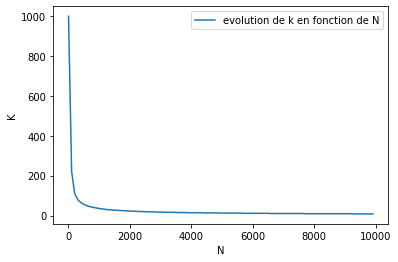

In [75]:
val_N = [N for N in range(10 ,10000, 100)]
val_K = [0 for _ in range(len(val_N))]
for i in range(len(val_N)) : 
    N = val_N[i]
    B = np.zeros(N)
    delta_X = 2/(N+1)
    val_x = [-1+i*delta_X for i in range(1 ,N+1)]
    G = np.array([g(x) for x in val_x])
    x_0 = np.ones(N)
    val_K[i] = GSP(alpha , beta , gamma , B , G, x_0 , epsilon , K)[1]
    
import matplotlib.pyplot as plt 

plt.plot(val_N , val_K , label="evolution de k en fonction de N")
plt.xlabel("N")
plt.ylabel("K")
plt.legend()
plt.show()
    

### Tache 3: Option américaine

In [76]:
def price_amr(N,M,K,T,sigma,r, delta, payOff,epsilon,K_max):
    U = np.zeros((N,M))
    C = np.zeros((N,M))
    
    a = np.log(K/10)
    b = np.log(K*10)
    
    delta_x = (b-a)/(N+1)
    delta_t = T/M
    
    alpha = (1+ sigma**2 * delta_t/delta_x**2 + r*delta_t)
    beta = -(sigma**2 * delta_t/(2*delta_x**2) + (r-delta-sigma**2 /2 )*delta_t/(2*delta_x))
    gamma = (-sigma**2 * delta_t/(2*delta_x**2) + (r-delta-sigma**2 /2 )*delta_t/(2*delta_x))
    
    F = np.zeros(N)
    F[0]= -gamma*payOff(np.exp(a),K)
    F[N-1]= -beta*payOff(np.exp(b),K)
    
    G = np.array([payOff(np.exp(a+n*delta_x),K) for n in range(1,N+1)])
    
    U[:,0]=G
    C[:,0]= np.array([1 for _ in range(N)])
    for m in range(1,M):
        B = U[:,m-1] + F
        x_0 = U[:,m-1]
        U[:,m] = GSP(alpha , beta , gamma , B , G, x_0 , epsilon , K_max)[0]
        for i in range(N):
            C[i,m] = 1 if U[i,m] == G[i] else 0

    
    return U, C


def payoff_call(S,K):
    return max(S-K,0)

  
def payoff_put(S,K):
    return max(K-S,0)
    
    

In [77]:
#test
N,M=100,100
K=1
T=1
sigma = 0.5
r = 0.02
delta = 0.01
epsilon = 10e-4
K_max = 1000

a = np.log(K/10)
b = np.log(K*10)

delta_x = (b-a)/(N+1)
delta_t = T/M

U,C = price_amr(N,M,K,T,sigma,r, delta, payoff_call,epsilon,K_max)

abs_x = [np.exp(a + i*delta_x) for i in range(1,N+1) ]
ord_y = [T-i*delta_t for i in range(1,M+1) ]

plt.figure(figsize=(10,6))
# Affichage de la matrice avec des axes personnalisés
plt.imshow(C.T, aspect='auto', extent=[abs_x[0], abs_x[-1], ord_y[-1], ord_y[0]])


# Affichage du graphique
plt.show()


TypeError: 'numpy.float64' object cannot be interpreted as an integer